In [16]:
#Load the dataset and display its shape, column names, and first 5 rows.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
file_path =r'C:\Users\Lavanya R\Downloads\gold_price_data.csv' # Update this if your file is in a different location
df = pd.read_csv(file_path)

# Display shape
print("Shape of the dataset:", df.shape)

# Display column names
print("Column names:", df.columns.tolist())

# Display first 5 rows
print("First 5 rows:")
print(df.head())

Shape of the dataset: (5215, 7)
Column names: ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']
First 5 rows:
         date       open       high        low      close  adj_close    volume
0  2004-11-18  44.380001  44.380001  44.490002  44.070000  44.430000   5992000
1  2004-11-19  44.779999  44.779999  44.919998  44.470001  44.490002  11655300
2  2004-11-22  44.950001  44.950001  44.970001  44.740002  44.750000  11996000
3  2004-11-23  44.750000  44.750000  44.919998  44.720001  44.880001   3169200
4  2004-11-24  45.049999  45.049999  45.049999  44.790001  44.930000   6105100


In [9]:
#Check for missing values and duplicates. Clean the dataset if necessary.
# Total missing values per column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values:\n", missing_percentage)

Missing values per column:
 date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

Percentage of missing values:
 date         0.0
open         0.0
high         0.0
low          0.0
close        0.0
adj_close    0.0
volume       0.0
dtype: float64


In [14]:
# Count duplicates
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

Number of duplicate rows: 0


In [15]:
print("Cleaned dataset shape:", df_cleaned.shape)

Cleaned dataset shape: (5215, 7)


In [17]:
#Perform exploratory data analysis (EDA): show descriptive statistics and visualize distributions of key features.
# Summary statistics
print(df.describe(include='all'))

# Data types and non-null counts
print(df.info())

              date         open         high          low        close  \
count         5215  5215.000000  5215.000000  5215.000000  5215.000000   
unique        5215          NaN          NaN          NaN          NaN   
top     2025-08-12          NaN          NaN          NaN          NaN   
freq             1          NaN          NaN          NaN          NaN   
mean           NaN   131.940968   131.940968   132.570993   131.256556   
std            NaN    51.291094    51.291094    51.459284    51.073175   
min            NaN    41.259998    41.259998    41.360001    41.020000   
25%            NaN   104.730000   104.730000   105.355000   104.160000   
50%            NaN   124.400002   124.400002   124.870003   123.980003   
75%            NaN   164.779999   164.779999   165.489998   164.004997   
max            NaN   316.290009   316.290009   317.630005   315.040009   

          adj_close        volume  
count   5215.000000  5.215000e+03  
unique          NaN           NaN  
top

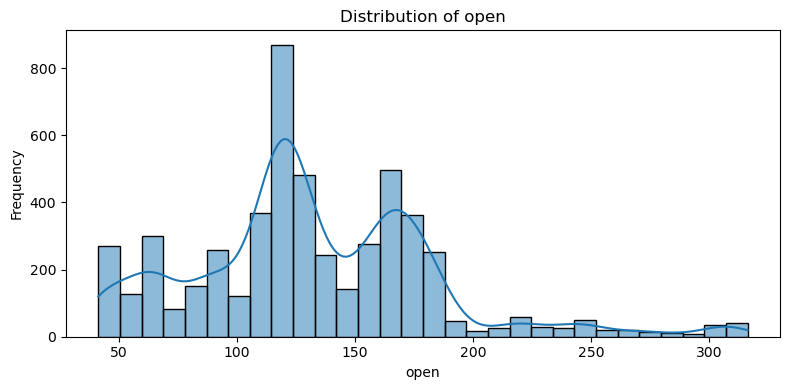

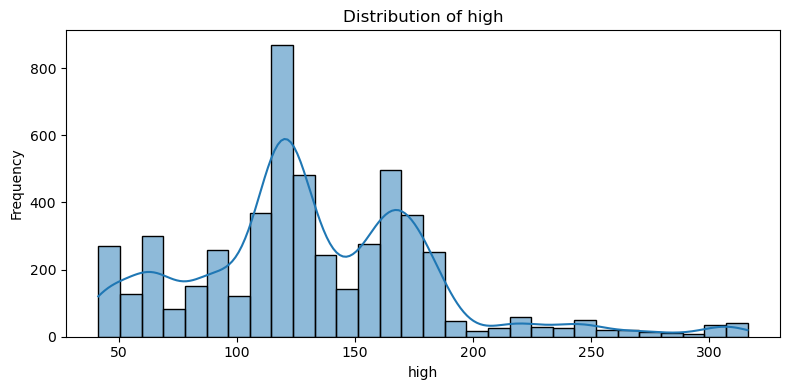

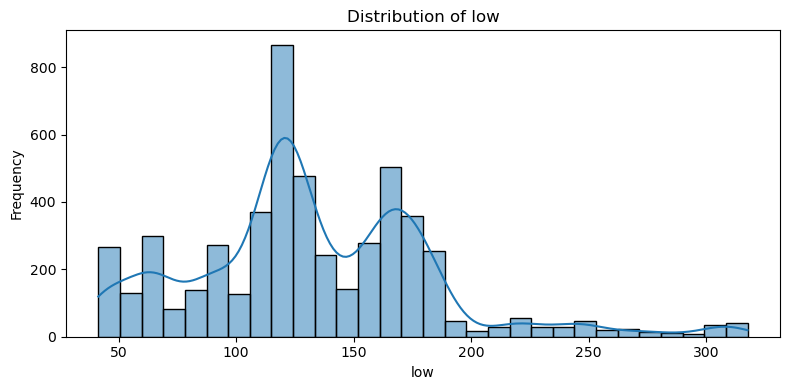

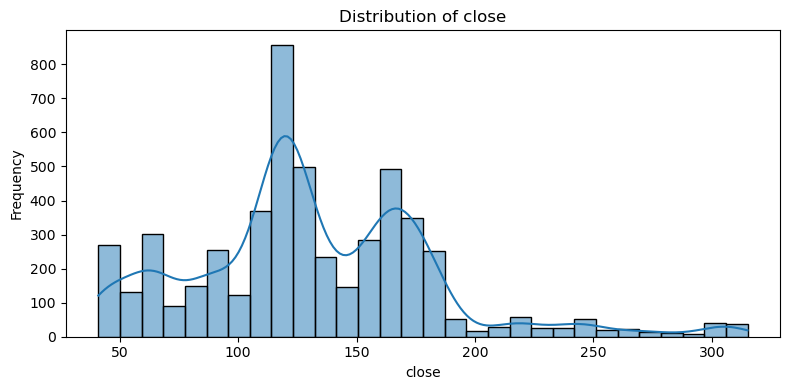

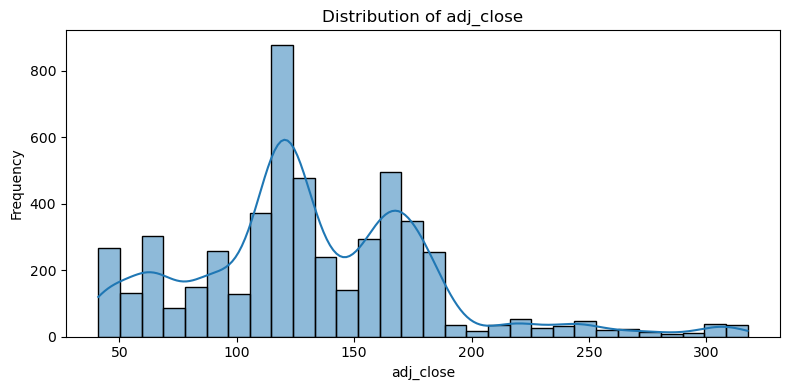

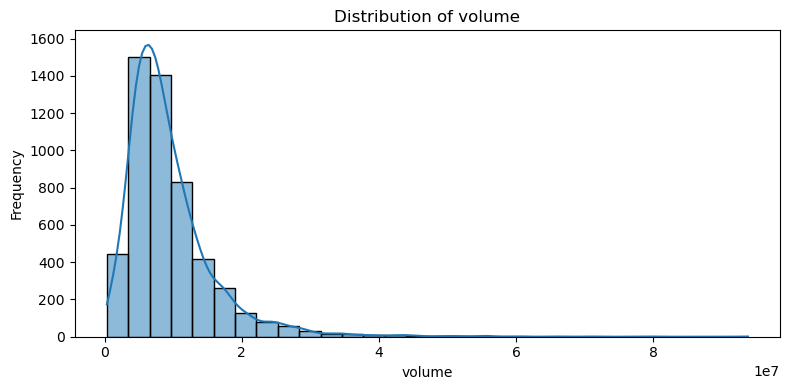

In [18]:
# Histogram for each numeric column
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

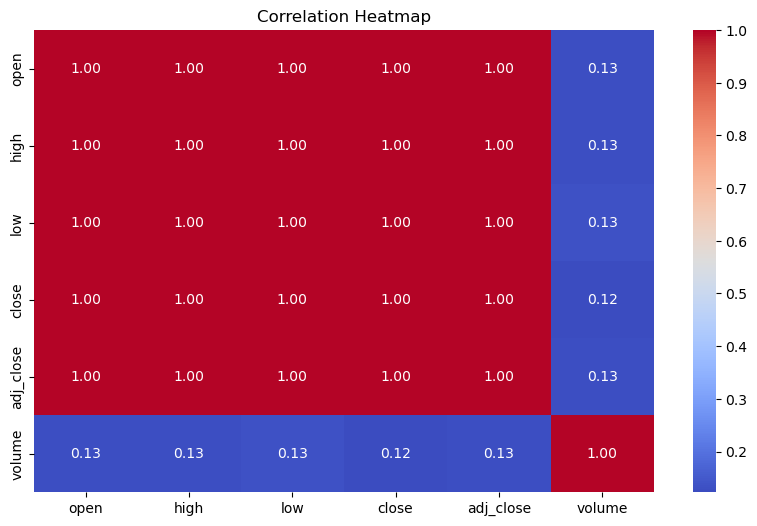

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

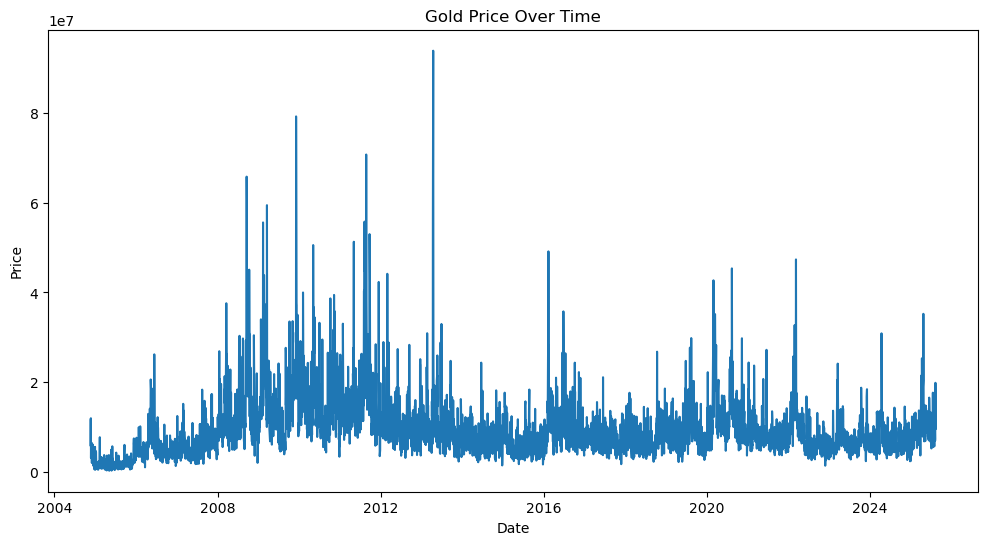

In [34]:
# Convert to datetime
df['date'] = pd.to_datetime(df['date'])

# Plot gold price over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='volume')  # Replace 'Gold_Price' with actual column name
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [21]:
#Create a correlation heatmap to identify which features are highly correlated with the target variableprint(df.columns)
print(df.columns)

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')


In [38]:
# Example feature selection
features = ['open', 'high', 'low', 'volume']  # Add more if available
target = 'close'  # Replace with actual target column name

X = df[features]
y = df[target]

In [39]:
#Split the dataset into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm the split
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (4172, 4)
Testing set shape: (1043, 4)


In [40]:
#Train a Linear Regression model on the training set.
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [41]:
# Coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(X_train.columns, model.coef_)))

Intercept: 0.21487234130464117
Coefficients: {'open': np.float64(0.2881920917944825), 'high': np.float64(0.2881920918654449), 'low': np.float64(0.4188492821833124), 'volume': np.float64(-5.645234223045492e-08)}


In [42]:
#Evaluate the model using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score on the test set.
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R² Score
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 0.26
Root Mean Squared Error (RMSE): 0.51
R² Score: 0.9999


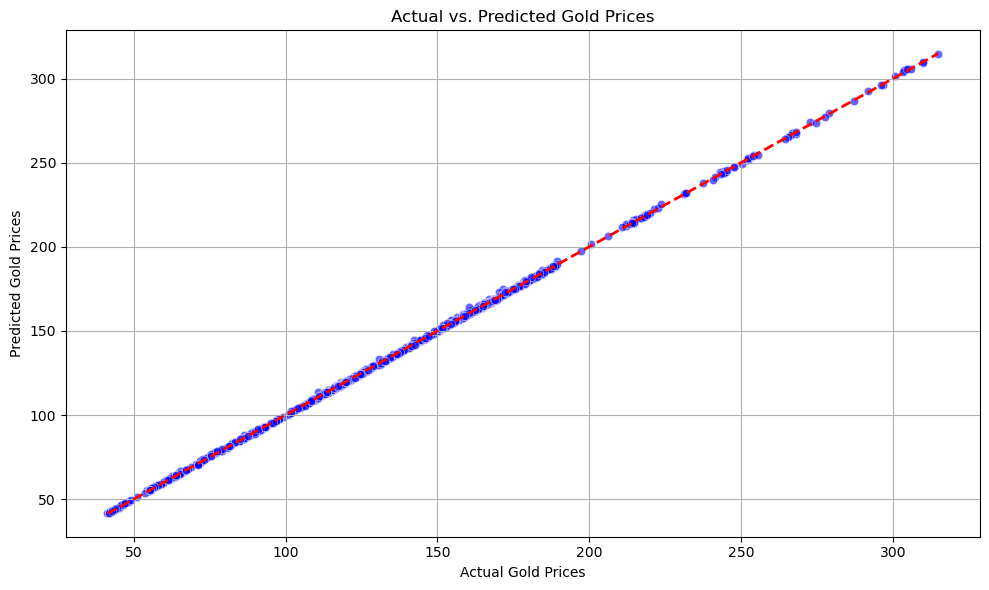

In [43]:
#Plot Actual vs. Predicted gold prices to visualize model performance
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
y_pred = model.predict(X_test)

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Gold Prices')
plt.ylabel('Predicted Gold Prices')
plt.title('Actual vs. Predicted Gold Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
#Interpret the model coefficients. Which features have the most significant impact on gold price prediction?
import pandas as pd

# Extract coefficients and feature names
coefficients = model.coef_
features = X_train.columns

# Create a DataFrame for easy interpretation
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort by absolute impact
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the results
print("Feature impact on gold price prediction:")
print(coef_df[['Feature', 'Coefficient']])

Feature impact on gold price prediction:
  Feature   Coefficient
2     low  4.188493e-01
1    high  2.881921e-01
0    open  2.881921e-01
3  volume -5.645234e-08
